# Lead Scoring Case Study

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Importing all datasets
Lead_data = pd.read_csv("Leads.csv")
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Lead_data.shape

(9240, 37)

In [5]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
#As we can see there are lot of cols which has Select ,which is same as missing values,hence replacing them with nan.
Lead_data=Lead_data.replace('Select', np.nan)

Handle missing values and null values

In [7]:
Lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

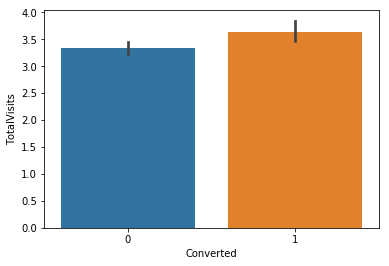

In [8]:
sns.barplot(x = Lead_data['Converted'], y = Lead_data['TotalVisits'])

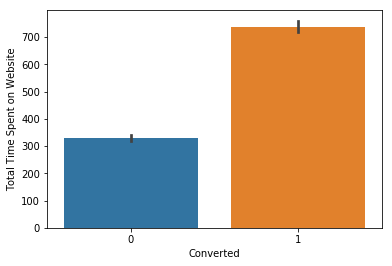

In [9]:
sns.barplot(x = Lead_data['Converted'], y = Lead_data['Total Time Spent on Website'])

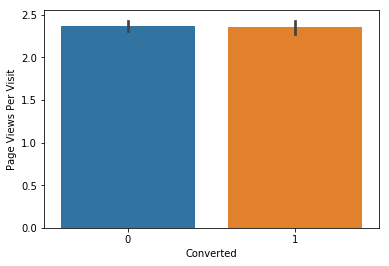

In [10]:
sns.barplot(x = Lead_data['Converted'], y = Lead_data['Page Views Per Visit'])

In [11]:
#Drop all columns in which greater than 3000 missing values are present
for col in Lead_data.columns:
    if Lead_data[col].isnull().sum() >2450:
        Lead_data.drop(col, 1, inplace = True)
Lead_data.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content             0
Get updates on DM Content               

In [12]:
# retaining the rows having <= 5 NaNs
Lead_data = Lead_data[Lead_data.isnull().sum(axis=1) <= 4]
print('\npercentage of null values in each column after removing the null values')
print(round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2))


percentage of null values in each column after removing the null values
Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0

In [13]:
Lead_data = Lead_data.dropna(how='any',axis=0) 

In [14]:
# Checking the percentage of missing values
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [15]:
Lead_data.shape

(9074, 24)

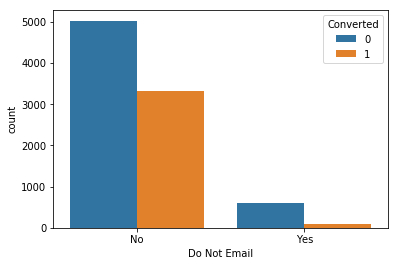

In [16]:
sns.countplot(x= 'Do Not Email', hue = 'Converted', data = Lead_data)

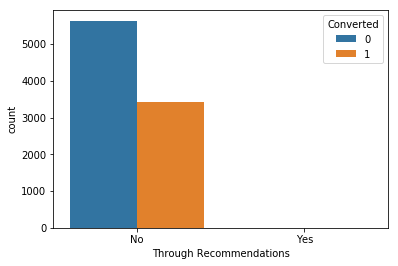

In [17]:
sns.countplot(x= 'Through Recommendations', hue = 'Converted', data = Lead_data)

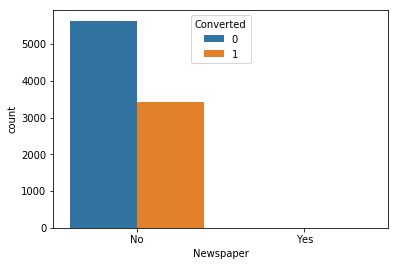

In [18]:
sns.countplot(x= 'Newspaper', hue = 'Converted', data = Lead_data)

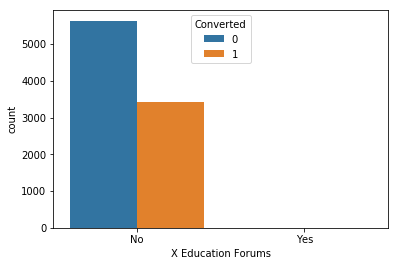

In [19]:
sns.countplot(x= 'X Education Forums', hue = 'Converted', data = Lead_data)

In [20]:
#Mapping Yes to 1 and No to 0 in the dataset.
Lead_data=Lead_data.replace('Yes', 1)
Lead_data=Lead_data.replace('No', 0)
#Printing all the unique values in each coluns after replacing
for col in Lead_data:
    print(col,Lead_data[col].unique())

Prospect ID ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Number [660737 660728 660727 ... 579545 579538 579533]
Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email [0 1]
Do Not Call [0 1]
Converted [0 1]
TotalVisits [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.   9.  12.
  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55. 141.
  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
Total Time Spent on Website [   0  6

In [21]:
Lead_data.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [22]:
#Removing outliers
Lead_data=Lead_data[np.abs(Lead_data.TotalVisits-Lead_data.TotalVisits.mean())<=(3*Lead_data.TotalVisits.std())] 
Lead_data=Lead_data[np.abs(Lead_data['Total Time Spent on Website']-Lead_data['Total Time Spent on Website'].mean())<=(3*Lead_data['Total Time Spent on Website'].std())] 


In [23]:
Lead_data.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.0,8997.000000,8997.0,8997.000000,8997.000000,8997.000000,8997.0,8997.0,8997.0,8997.0,8997.000000
mean,617087.576859,0.077915,0.000222,0.377904,3.240969,479.588307,2.345931,0.001445,0.0,0.000111,0.0,0.000111,0.000333,0.000667,0.0,0.0,0.0,0.0,0.316328
std,23354.402120,0.268052,0.014909,0.484890,3.047635,542.390692,2.061328,0.037987,0.0,0.010543,0.0,0.010543,0.018258,0.025817,0.0,0.0,0.0,0.0,0.465068
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596425.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615461.000000,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637187.000000,0.000000,0.000000,1.000000,5.000000,915.000000,3.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,18.000000,2112.000000,16.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [24]:
Lead_data.shape

(8997, 24)

In [25]:
#Creating dummy variables
dummy = pd.get_dummies(Lead_data[['Lead Origin', 'Lead Source', 'Last Activity','Last Notable Activity']],drop_first=True )


In [26]:
Lead_data = pd.concat([Lead_data,dummy],axis=1)


In [27]:
#Droping columns after converting dummy variables of them.
Lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity','Last Notable Activity'], axis=1, inplace=True)

In [28]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 0 to 9239
Data columns (total 74 columns):
Prospect ID                                           8997 non-null object
Lead Number                                           8997 non-null int64
Do Not Email                                          8997 non-null int64
Do Not Call                                           8997 non-null int64
Converted                                             8997 non-null int64
TotalVisits                                           8997 non-null float64
Total Time Spent on Website                           8997 non-null int64
Page Views Per Visit                                  8997 non-null float64
Search                                                8997 non-null int64
Magazine                                              8997 non-null int64
Newspaper Article                                     8997 non-null int64
X Education Forums                                    8997 non-null int64


In [29]:
#Checking the percentage of conversion.
Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

37.79037456930088

# Test- Train Split

In [30]:
#Test- Train split
from sklearn.model_selection import train_test_split

In [31]:
X = Lead_data.drop(['Converted','Prospect ID'], 1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
#Put the target variablein Y
Y = Lead_data['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [33]:
#Split the dataset into 70% and 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.describe()


,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6297.000000,6297.000000,6297.000000,6.297000e+03,6.297000e+03,6.297000e+03,6297.000000,6297.0,6297.000000,6297.0,...,6297.000000,6297.000000,6297.000000,6297.000000,6297.000000,6297.0,6297.000000,6297.000000,6297.000000,6297.0
mean,617128.975067,0.078926,0.000318,-3.413358e-17,-2.702125e-16,-1.073374e-16,0.001588,0.0,0.000159,0.0,...,0.000159,0.001588,0.357948,0.022074,0.031920,0.0,0.237573,0.003811,0.005399,0.0
std,23238.318298,0.269645,0.017820,1.000079e+00,1.000079e+00,1.000079e+00,0.039822,0.0,0.012602,0.0,...,0.012602,0.039822,0.479435,0.146936,0.175801,0.0,0.425630,0.061623,0.073288,0.0
min,579533.000000,0.000000,0.000000,-1.055269e+00,-8.837397e-01,-1.122077e+00,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,596643.000000,0.000000,0.000000,-7.275725e-01,-8.689605e-01,-6.434517e-01,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,615707.000000,0.000000,0.000000,-7.217961e-02,-4.311272e-01,-1.648260e-01,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,637079.000000,0.000000,0.000000,5.832133e-01,7.881553e-01,3.137997e-01,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,660728.000000,1.000000,1.000000,4.843267e+00,3.017964e+00,6.535934e+00,1.000000,0.0,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


# Looking at Coorelations

In [36]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
# Let's see the correlation matrix 
Lead_data.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,1.000000,-0.099878,0.012164,0.024292,0.051092,0.020988,0.062600,-0.012413,NaN,-0.014408,...,0.000674,0.003999,0.072476,-0.032333,0.002887,0.006079,-0.169492,0.008016,0.001401,0.001569
Do Not Email,-0.099878,1.000000,-0.004335,-0.139327,-0.005432,-0.045898,0.026997,-0.011058,NaN,-0.003065,...,-0.003065,-0.011058,0.123966,-0.012314,0.037292,-0.003065,-0.026585,-0.010401,0.243905,-0.003065
Do Not Call,0.012164,-0.004335,1.000000,0.019132,0.006160,0.007187,-0.006120,-0.000567,NaN,-0.000157,...,-0.000157,-0.000567,0.019819,-0.002143,-0.002745,-0.000157,-0.008315,-0.000891,-0.001057,-0.000157
Converted,0.024292,-0.139327,0.019132,1.000000,0.047819,0.359463,0.001300,0.000527,NaN,0.013527,...,-0.008217,0.042771,-0.263363,-0.072913,-0.034088,0.013527,0.361915,0.038148,-0.016266,-0.008217
TotalVisits,0.051092,-0.005432,0.006160,0.047819,1.000000,0.340920,0.729038,0.069006,NaN,0.019924,...,-0.004293,0.024837,-0.145126,-0.055922,0.197005,-0.011213,0.016443,0.013043,0.009904,0.016465
Total Time Spent on Website,0.020988,-0.045898,0.007187,0.359463,0.340920,1.000000,0.335067,0.012254,NaN,0.010214,...,-0.003744,0.025424,-0.125817,-0.052371,0.027793,-0.009323,0.135346,0.010049,0.004420,-0.007593
Page Views Per Visit,0.062600,0.026997,-0.006120,0.001300,0.729038,0.335067,1.000000,0.036517,NaN,0.034036,...,-0.001769,0.013632,-0.103709,-0.091731,0.020721,-0.012000,0.064234,0.021141,0.023645,0.001658
Search,-0.012413,-0.011058,-0.000567,0.000527,0.069006,0.012254,0.036517,1.000000,NaN,-0.000401,...,-0.000401,-0.001447,-0.022529,-0.005466,0.009427,-0.000401,-0.014333,-0.002273,-0.002697,-0.000401
Magazine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Newspaper Article,-0.014408,-0.003065,-0.000157,0.013527,0.019924,0.010214,0.034036,-0.000401,NaN,1.000000,...,-0.000111,-0.000401,0.014013,-0.001515,-0.001941,-0.000111,-0.005879,-0.000630,-0.000748,-0.000111


# Model Building

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             
rfe = rfe.fit(X_train, Y_train)

In [40]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 17),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Search', False, 38),
 ('Magazine', False, 45),
 ('Newspaper Article', False, 27),
 ('X Education Forums', False, 40),
 ('Newspaper', False, 33),
 ('Digital Advertisement', False, 39),
 ('Through Recommendations', False, 18),
 ('Receive More Updates About Our Courses', False, 41),
 ('Update me on Supply Chain Content', False, 42),
 ('Get updates on DM Content', False, 43),
 ('I agree to pay the amount through cheque', False, 44),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 16),
 ('Lead Source_NC_EDM', False, 28

In [41]:
cols = X_train.columns[rfe.support_]

In [42]:
X_train = X_train[cols]

In [43]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, Y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm1.fit()
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.5
Date:                Mon, 10 Jun 2019   Deviance:                       5501.1
Time:                        09:57:49   Pearson chi2:                 6.31e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.7117      1.054     -3.522      0.000      -5.777      -1.646
Lead Number                                    5.865e-06   1.53e-06      3.833      0.000    2.87e-06    8.86e-06
Do Not Email                                     -1.2189      0.192     -6.357      0.000      -1.595      -0.843
TotalVisits                                       0.1740      0.043      4.006      0.000       0.089       0.259
Total Time Spent on Website                       1.0939      0.039     27.995      0.000       1.017       1.170
A free copy of Mastering The Interview            0.0503      0.105      0.480      0.631      -0.155       0.255
Lead Origin_Landing Page Submission              -0.1137      0.101     -1.123      0.262      -0.312       0.085
Lead Origin_Lead Add Form                         2.7769      1.158      2.398      0.017       0.507       5.047
Lead Source_Direct Traffic                       -0.2288      0.268     -0.852      0.394      -0.755       0.297
Lead Source_Google                                0.1196      0.254      0.470      0.638      -0.379       0.618
Lead Source_Olark Chat                            1.1591      0.268      4.328      0.000       0.634       1.684
Lead Source_Organic Search                       -0.1178      0.266     -0.442      0.659      -0.640       0.405
Lead Source_Reference                             1.7924      1.180      1.519      0.129      -0.520       4.104
Lead Source_Welingak Website                     23.5013   1.19e+04      0.002      0.998   -2.34e+04    2.34e+04
Last Activity_Converted to Lead                  -0.7790      0.290     -2.686      0.007      -1.347      -0.211
Last Activity_Email Bounced                      -1.0219      0.405     -2.524      0.012      -1.816      -0.228
Last Activity_Email Link Clicked                 -1.2108      0.294     -4.125      0.000      -1.786      -0.635
Last Activity_Email Opened                        0.1474      0.241      0.613      0.540      -0.324       0.619
Last Activity_Olark Chat Conversation            -1.1896      0.266     -4.469      0.000      -1.711      -0.668
Last Activity_Page Visited on Website            -0.6147      0.293     -2.101      0.036      -1.188      -0.041
Last Activity_SMS Sent                            0.5195      0.243      2.142      0.032       0.044       0.995
Last Notable Activity_Email Opened               -1.0878      0.301     -3.611      0.000      -1.678      -0.497
Last Notable Activity_Modified                   -1.3305      0.270     -4.929      0.000      -1.860      -0.801
Last Notable Activity_Olark Chat Conversation    -1.4767      0.441     -3.348      0.001      -2.341      -0.612
Last Notable Activity_Page Visited on Website    -0.9016      0.391     -2.305      

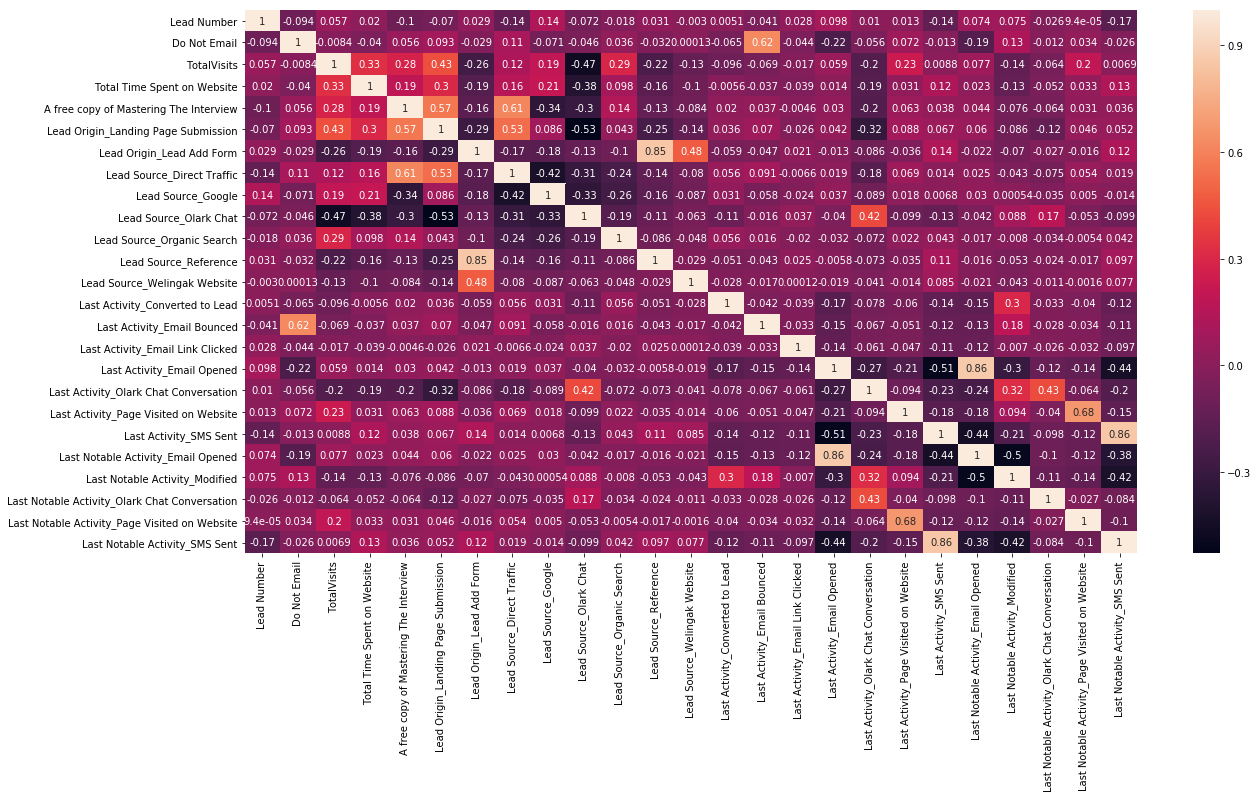

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,85.05
6,Lead Origin_Lead Add Form,61.46
11,Lead Source_Reference,46.32
20,Last Notable Activity_Email Opened,21.68
16,Last Activity_Email Opened,19.49
21,Last Notable Activity_Modified,18.33
24,Last Notable Activity_SMS Sent,16.92
8,Lead Source_Google,16.58
7,Lead Source_Direct Traffic,16.17
12,Lead Source_Welingak Website,15.63


In [47]:
#Removing insignificant column
X_train=X_train.drop(['Lead Number'],1)

In [48]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.9
Date:                Mon, 10 Jun 2019   Deviance:                       5515.8
Time:                        09:57:52   Pearson chi2:                 6.39e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1061      0.347      0.306      0.759      -0.573       0.785
Do Not Email                                     -1.2606      0.191     -6.592      0.000      -1.635      -0.886
TotalVisits                                       0.1796      0.043      4.135      0.000       0.094       0.265
Total Time Spent on Website                       1.0943      0.039     28.011      0.000       1.018       1.171
A free copy of Mastering The Interview            0.0515      0.105      0.492      0.623      -0.154       0.256
Lead Origin_Landing Page Submission              -0.1272      0.101     -1.257      0.209      -0.326       0.071
Lead Origin_Lead Add Form                         2.7979      1.155      2.423      0.015       0.535       5.061
Lead Source_Direct Traffic                       -0.4055      0.266     -1.527      0.127      -0.926       0.115
Lead Source_Google                               -0.0105      0.253     -0.042      0.967      -0.506       0.485
Lead Source_Olark Chat                            0.9782      0.264      3.700      0.000       0.460       1.496
Lead Source_Organic Search                       -0.2791      0.264     -1.056      0.291      -0.797       0.239
Lead Source_Reference                             1.6229      1.176      1.380      0.168      -0.683       3.928
Lead Source_Welingak Website                     23.3393   1.19e+04      0.002      0.998   -2.33e+04    2.34e+04
Last Activity_Converted to Lead                  -0.7938      0.289     -2.744      0.006      -1.361      -0.227
Last Activity_Email Bounced                      -1.0272      0.406     -2.529      0.011      -1.823      -0.231
Last Activity_Email Link Clicked                 -1.2252      0.293     -4.176      0.000      -1.800      -0.650
Last Activity_Email Opened                        0.1198      0.242      0.496      0.620      -0.354       0.593
Last Activity_Olark Chat Conversation            -1.2097      0.267     -4.531      0.000      -1.733      -0.686
Last Activity_Page Visited on Website            -0.6436      0.293     -2.197      0.028      -1.218      -0.069
Last Activity_SMS Sent                            0.4842      0.243      1.991      0.046       0.008       0.961
Last Notable Activity_Email Opened               -1.0813      0.302     -3.586      0.000      -1.672      -0.490
Last Notable Activity_Modified                   -1.3143      0.270     -4.864      0.000      -1.844      -0.785
Last Notable Activity_Olark Chat Conversation    -1.5112      0.442     -3.419      0.001      -2.377      -0.645
Last Notable Activity_Page Visited on Website    -0.9041      0.391     -2.312      0.021      -1.671      -0.138
Last Notable Activity_SMS Sent                    0.0270      0.306      0.088      

In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,60.90
10,Lead Source_Reference,46.17
19,Last Notable Activity_Email Opened,18.65
15,Last Activity_Email Opened,18.32
11,Lead Source_Welingak Website,15.58
18,Last Activity_SMS Sent,14.77
23,Last Notable Activity_SMS Sent,14.72
20,Last Notable Activity_Modified,14.65
6,Lead Source_Direct Traffic,11.27
7,Lead Source_Google,10.28


In [50]:
#Removing insignificant column
X_train=X_train.drop(['Lead Origin_Lead Add Form'],1)

In [51]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.0
Date:                Mon, 10 Jun 2019   Deviance:                       5524.0
Time:                        09:57:53   Pearson chi2:                 6.39e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2104      0.341      0.618      0.537      -0.457       0.878
Do Not Email                                     -1.2638      0.191     -6.609      0.000      -1.639      -0.889
TotalVisits                                       0.1754      0.043      4.054      0.000       0.091       0.260
Total Time Spent on Website                       1.0925      0.039     28.008      0.000       1.016       1.169
A free copy of Mastering The Interview            0.0515      0.105      0.493      0.622      -0.153       0.256
Lead Origin_Landing Page Submission              -0.1336      0.101     -1.321      0.187      -0.332       0.065
Lead Source_Direct Traffic                       -0.5070      0.258     -1.965      0.049      -1.013      -0.001
Lead Source_Google                               -0.1118      0.245     -0.457      0.648      -0.591       0.368
Lead Source_Olark Chat                            0.8693      0.256      3.398      0.001       0.368       1.371
Lead Source_Organic Search                       -0.3804      0.256     -1.484      0.138      -0.883       0.122
Lead Source_Reference                             4.3067      0.343     12.540      0.000       3.634       4.980
Lead Source_Welingak Website                     26.0228   1.19e+04      0.002      0.998   -2.33e+04    2.34e+04
Last Activity_Converted to Lead                  -0.7955      0.289     -2.751      0.006      -1.362      -0.229
Last Activity_Email Bounced                      -1.0237      0.406     -2.521      0.012      -1.820      -0.228
Last Activity_Email Link Clicked                 -1.2247      0.293     -4.176      0.000      -1.799      -0.650
Last Activity_Email Opened                        0.1190      0.241      0.493      0.622      -0.354       0.592
Last Activity_Olark Chat Conversation            -1.2141      0.267     -4.550      0.000      -1.737      -0.691
Last Activity_Page Visited on Website            -0.6334      0.292     -2.169      0.030      -1.206      -0.061
Last Activity_SMS Sent                            0.4862      0.243      2.000      0.045       0.010       0.963
Last Notable Activity_Email Opened               -1.0734      0.301     -3.562      0.000      -1.664      -0.483
Last Notable Activity_Modified                   -1.3141      0.270     -4.866      0.000      -1.843      -0.785
Last Notable Activity_Olark Chat Conversation    -1.5056      0.442     -3.409      0.001      -2.371      -0.640
Last Notable Activity_Page Visited on Website    -0.9082      0.390     -2.327      0.020      -1.673      -0.143
Last Notable Activity_SMS Sent                    0.0319      0.306      0.104      0.917      -0.568       0.631
====================================================================================

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_Email Opened,18.60
14,Last Activity_Email Opened,18.31
17,Last Activity_SMS Sent,14.76
22,Last Notable Activity_SMS Sent,14.69
19,Last Notable Activity_Modified,14.62
5,Lead Source_Direct Traffic,11.20
6,Lead Source_Google,10.21
7,Lead Source_Olark Chat,7.02
4,Lead Origin_Landing Page Submission,5.27
15,Last Activity_Olark Chat Conversation,5.21


In [53]:
#Removing insignificant column
X_train=X_train.drop(['Last Notable Activity_Email Opened'],1)

In [54]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.4
Date:                Mon, 10 Jun 2019   Deviance:                       5536.8
Time:                        09:57:53   Pearson chi2:                 6.39e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3393      0.304     -1.117      0.264      -0.935       0.256
Do Not Email                                     -1.1668      0.187     -6.229      0.000      -1.534      -0.800
TotalVisits                                       0.1767      0.043      4.088      0.000       0.092       0.261
Total Time Spent on Website                       1.0929      0.039     28.080      0.000       1.017       1.169
A free copy of Mastering The Interview            0.0530      0.104      0.508      0.612      -0.152       0.258
Lead Origin_Landing Page Submission              -0.1437      0.101     -1.423      0.155      -0.342       0.054
Lead Source_Direct Traffic                       -0.5097      0.258     -1.976      0.048      -1.015      -0.004
Lead Source_Google                               -0.1187      0.245     -0.485      0.627      -0.598       0.361
Lead Source_Olark Chat                            0.8661      0.256      3.386      0.001       0.365       1.367
Lead Source_Organic Search                       -0.3879      0.256     -1.514      0.130      -0.890       0.114
Lead Source_Reference                             4.2635      0.342     12.480      0.000       3.594       4.933
Lead Source_Welingak Website                     26.0251   1.19e+04      0.002      0.998   -2.33e+04    2.34e+04
Last Activity_Converted to Lead                  -1.0857      0.272     -3.986      0.000      -1.620      -0.552
Last Activity_Email Bounced                      -1.0589      0.398     -2.661      0.008      -1.839      -0.279
Last Activity_Email Link Clicked                 -0.8978      0.275     -3.265      0.001      -1.437      -0.359
Last Activity_Email Opened                       -0.3587      0.197     -1.823      0.068      -0.744       0.027
Last Activity_Olark Chat Conversation            -1.5106      0.248     -6.089      0.000      -1.997      -1.024
Last Activity_Page Visited on Website            -0.9312      0.275     -3.388      0.001      -1.470      -0.392
Last Activity_SMS Sent                            0.1902      0.222      0.855      0.392      -0.246       0.626
Last Notable Activity_Modified                   -0.4627      0.123     -3.767      0.000      -0.703      -0.222
Last Notable Activity_Olark Chat Conversation    -0.6554      0.370     -1.771      0.077      -1.381       0.070
Last Notable Activity_Page Visited on Website    -0.0573      0.307     -0.186      0.852      -0.659       0.545
Last Notable Activity_SMS Sent                    0.8824      0.190      4.655      0.000       0.511       1.254
=================================================================================================================
"""

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Activity_SMS Sent,12.01
5,Lead Source_Direct Traffic,9.90
14,Last Activity_Email Opened,8.72
6,Lead Source_Google,8.63
21,Last Notable Activity_SMS Sent,7.93
7,Lead Source_Olark Chat,6.07
4,Lead Origin_Landing Page Submission,5.25
18,Last Notable Activity_Modified,4.49
8,Lead Source_Organic Search,4.19
15,Last Activity_Olark Chat Conversation,4.13


In [56]:
#Removing insignificant column
X_train=X_train.drop(['Last Activity_SMS Sent'],1)

In [57]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.8
Date:                Mon, 10 Jun 2019   Deviance:                       5537.6
Time:                        09:57:54   Pearson chi2:                 6.39e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2378      0.279     -0.852      0.394      -0.785       0.309
Do Not Email                                     -1.1812      0.187     -6.331      0.000      -1.547      -0.816
TotalVisits                                       0.1765      0.043      4.086      0.000       0.092       0.261
Total Time Spent on Website                       1.0930      0.039     28.083      0.000       1.017       1.169
A free copy of Mastering The Interview            0.0530      0.104      0.508      0.611      -0.152       0.258
Lead Origin_Landing Page Submission              -0.1449      0.101     -1.435      0.151      -0.343       0.053
Lead Source_Direct Traffic                       -0.5012      0.258     -1.944      0.052      -1.007       0.004
Lead Source_Google                               -0.1128      0.245     -0.461      0.645      -0.592       0.367
Lead Source_Olark Chat                            0.8723      0.256      3.409      0.001       0.371       1.374
Lead Source_Organic Search                       -0.3808      0.256     -1.486      0.137      -0.883       0.121
Lead Source_Reference                             4.2723      0.342     12.505      0.000       3.603       4.942
Lead Source_Welingak Website                     26.0394   1.19e+04      0.002      0.998   -2.33e+04    2.33e+04
Last Activity_Converted to Lead                  -1.2124      0.228     -5.321      0.000      -1.659      -0.766
Last Activity_Email Bounced                      -1.1656      0.377     -3.091      0.002      -1.905      -0.427
Last Activity_Email Link Clicked                 -1.0112      0.240     -4.209      0.000      -1.482      -0.540
Last Activity_Email Opened                       -0.4691      0.147     -3.186      0.001      -0.758      -0.181
Last Activity_Olark Chat Conversation            -1.6369      0.199     -8.243      0.000      -2.026      -1.248
Last Activity_Page Visited on Website            -1.0562      0.232     -4.552      0.000      -1.511      -0.601
Last Notable Activity_Modified                   -0.4439      0.121     -3.683      0.000      -0.680      -0.208
Last Notable Activity_Olark Chat Conversation    -0.6365      0.369     -1.723      0.085      -1.361       0.088
Last Notable Activity_Page Visited on Website    -0.0387      0.306     -0.126      0.899      -0.639       0.562
Last Notable Activity_SMS Sent                    0.9658      0.163      5.931      0.000       0.647       1.285
=================================================================================================================
"""

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Direct Traffic,8.03
6,Lead Source_Google,6.55
14,Last Activity_Email Opened,5.77
4,Lead Origin_Landing Page Submission,5.25
7,Lead Source_Olark Chat,4.72
20,Last Notable Activity_SMS Sent,4.66
17,Last Notable Activity_Modified,4.01
8,Lead Source_Organic Search,3.35
3,A free copy of Mastering The Interview,3.12
15,Last Activity_Olark Chat Conversation,2.63


In [59]:
#Removing insignificant column
X_train=X_train.drop(['Lead Source_Direct Traffic'],1)

In [60]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.6
Date:                Mon, 10 Jun 2019   Deviance:                       5541.2
Time:                        09:57:54   Pearson chi2:                 6.38e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6436      0.190     -3.381      0.001      -1.017      -0.270
Do Not Email                                     -1.1786      0.186     -6.323      0.000      -1.544      -0.813
TotalVisits                                       0.1850      0.043      4.300      0.000       0.101       0.269
Total Time Spent on Website                       1.0882      0.039     28.050      0.000       1.012       1.164
A free copy of Mastering The Interview            0.0182      0.103      0.177      0.859      -0.183       0.219
Lead Origin_Landing Page Submission              -0.1804      0.099     -1.817      0.069      -0.375       0.014
Lead Source_Google                                0.3219      0.105      3.053      0.002       0.115       0.528
Lead Source_Olark Chat                            1.2877      0.148      8.728      0.000       0.999       1.577
Lead Source_Organic Search                        0.0639      0.120      0.533      0.594      -0.171       0.299
Lead Source_Reference                             4.6873      0.270     17.332      0.000       4.157       5.217
Lead Source_Welingak Website                     26.4549   1.19e+04      0.002      0.998   -2.33e+04    2.33e+04
Last Activity_Converted to Lead                  -1.2193      0.228     -5.352      0.000      -1.666      -0.773
Last Activity_Email Bounced                      -1.1711      0.377     -3.108      0.002      -1.910      -0.433
Last Activity_Email Link Clicked                 -1.0117      0.240     -4.211      0.000      -1.483      -0.541
Last Activity_Email Opened                       -0.4727      0.147     -3.209      0.001      -0.761      -0.184
Last Activity_Olark Chat Conversation            -1.6325      0.198     -8.227      0.000      -2.021      -1.244
Last Activity_Page Visited on Website            -1.0556      0.232     -4.548      0.000      -1.510      -0.601
Last Notable Activity_Modified                   -0.4442      0.121     -3.682      0.000      -0.681      -0.208
Last Notable Activity_Olark Chat Conversation    -0.6432      0.369     -1.743      0.081      -1.367       0.080
Last Notable Activity_Page Visited on Website    -0.0546      0.306     -0.178      0.858      -0.655       0.546
Last Notable Activity_SMS Sent                    0.9549      0.163      5.865      0.000       0.636       1.274
=================================================================================================================
"""

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.43
16,Last Notable Activity_Modified,3.17
13,Last Activity_Email Opened,3.15
6,Lead Source_Olark Chat,3.01
3,A free copy of Mastering The Interview,2.87
19,Last Notable Activity_SMS Sent,2.70
5,Lead Source_Google,2.55
15,Last Activity_Page Visited on Website,2.48
14,Last Activity_Olark Chat Conversation,2.40
18,Last Notable Activity_Page Visited on Website,2.19


In [62]:
#Removing insignificant column
X_train=X_train.drop(['Last Notable Activity_Page Visited on Website'],1)

In [63]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.6
Date:                Mon, 10 Jun 2019   Deviance:                       5541.2
Time:                        09:57:55   Pearson chi2:                 6.38e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6515      0.185     -3.522      0.000      -1.014      -0.289
Do Not Email                                     -1.1772      0.186     -6.321      0.000      -1.542      -0.812
TotalVisits                                       0.1844      0.043      4.298      0.000       0.100       0.269
Total Time Spent on Website                       1.0882      0.039     28.051      0.000       1.012       1.164
A free copy of Mastering The Interview            0.0187      0.103      0.182      0.856      -0.182       0.220
Lead Origin_Landing Page Submission              -0.1801      0.099     -1.815      0.069      -0.375       0.014
Lead Source_Google                                0.3224      0.105      3.059      0.002       0.116       0.529
Lead Source_Olark Chat                            1.2873      0.148      8.727      0.000       0.998       1.576
Lead Source_Organic Search                        0.0646      0.120      0.540      0.589      -0.170       0.299
Lead Source_Reference                             4.6863      0.270     17.333      0.000       4.156       5.216
Lead Source_Welingak Website                     26.4540   1.19e+04      0.002      0.998   -2.33e+04    2.33e+04
Last Activity_Converted to Lead                  -1.2206      0.228     -5.360      0.000      -1.667      -0.774
Last Activity_Email Bounced                      -1.1707      0.377     -3.107      0.002      -1.909      -0.432
Last Activity_Email Link Clicked                 -1.0066      0.239     -4.220      0.000      -1.474      -0.539
Last Activity_Email Opened                       -0.4664      0.143     -3.262      0.001      -0.747      -0.186
Last Activity_Olark Chat Conversation            -1.6331      0.198     -8.231      0.000      -2.022      -1.244
Last Activity_Page Visited on Website            -1.0811      0.184     -5.886      0.000      -1.441      -0.721
Last Notable Activity_Modified                   -0.4358      0.111     -3.923      0.000      -0.654      -0.218
Last Notable Activity_Olark Chat Conversation    -0.6348      0.366     -1.734      0.083      -1.352       0.083
Last Notable Activity_SMS Sent                    0.9623      0.157      6.114      0.000       0.654       1.271
=================================================================================================================
"""

In [64]:
#Removing insignificant column
X_train=X_train.drop(['Lead Source_Welingak Website'],1)

In [65]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.2
Date:                Mon, 10 Jun 2019   Deviance:                       5838.3
Time:                        09:57:55   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1782      0.171      1.045      0.296      -0.156       0.513
Do Not Email                                     -1.1117      0.177     -6.288      0.000      -1.458      -0.765
TotalVisits                                       0.0853      0.041      2.060      0.039       0.004       0.166
Total Time Spent on Website                       0.9967      0.037     26.610      0.000       0.923       1.070
A free copy of Mastering The Interview           -0.2239      0.099     -2.262      0.024      -0.418      -0.030
Lead Origin_Landing Page Submission              -0.5283      0.094     -5.599      0.000      -0.713      -0.343
Lead Source_Google                               -0.1663      0.098     -1.703      0.089      -0.358       0.025
Lead Source_Olark Chat                            0.3500      0.128      2.724      0.006       0.098       0.602
Lead Source_Organic Search                       -0.2836      0.116     -2.454      0.014      -0.510      -0.057
Lead Source_Reference                             3.7079      0.259     14.290      0.000       3.199       4.216
Last Activity_Converted to Lead                  -1.4740      0.223     -6.612      0.000      -1.911      -1.037
Last Activity_Email Bounced                      -1.2804      0.359     -3.570      0.000      -1.983      -0.578
Last Activity_Email Link Clicked                 -0.9923      0.229     -4.333      0.000      -1.441      -0.543
Last Activity_Email Opened                       -0.5122      0.138     -3.720      0.000      -0.782      -0.242
Last Activity_Olark Chat Conversation            -1.7746      0.195     -9.083      0.000      -2.157      -1.392
Last Activity_Page Visited on Website            -1.0814      0.177     -6.122      0.000      -1.428      -0.735
Last Notable Activity_Modified                   -0.4453      0.107     -4.165      0.000      -0.655      -0.236
Last Notable Activity_Olark Chat Conversation    -0.4272      0.349     -1.223      0.221      -1.112       0.258
Last Notable Activity_SMS Sent                    0.9413      0.152      6.203      0.000       0.644       1.239
=================================================================================================================
"""

In [66]:
#Removing insignificant column
X_train=X_train.drop(['Last Notable Activity_Olark Chat Conversation'],1)

In [67]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm2 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.9
Date:                Mon, 10 Jun 2019   Deviance:                       5839.9
Time:                        09:57:55   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1432      0.168      0.853      0.394      -0.186       0.472
Do Not Email                              -1.1084      0.177     -6.276      0.000      -1.454      -0.762
TotalVisits                                0.0855      0.041      2.067      0.039       0.004       0.167
Total Time Spent on Website                0.9945      0.037     26.605      0.000       0.921       1.068
A free copy of Mastering The Interview    -0.2265      0.099     -2.290      0.022      -0.420      -0.033
Lead Origin_Landing Page Submission       -0.5270      0.094     -5.588      0.000      -0.712      -0.342
Lead Source_Google                        -0.1688      0.098     -1.729      0.084      -0.360       0.023
Lead Source_Olark Chat                     0.3467      0.128      2.698      0.007       0.095       0.598
Lead Source_Organic Search                -0.2826      0.116     -2.446      0.014      -0.509      -0.056
Lead Source_Reference                      3.6961      0.259     14.265      0.000       3.188       4.204
Last Activity_Converted to Lead           -1.4786      0.223     -6.637      0.000      -1.915      -1.042
Last Activity_Email Bounced               -1.2746      0.358     -3.558      0.000      -1.977      -0.572
Last Activity_Email Link Clicked          -0.9674      0.228     -4.245      0.000      -1.414      -0.521
Last Activity_Email Opened                -0.4818      0.135     -3.565      0.000      -0.747      -0.217
Last Activity_Olark Chat Conversation     -1.8765      0.181    -10.388      0.000      -2.231      -1.522
Last Activity_Page Visited on Website     -1.0635      0.176     -6.051      0.000      -1.408      -0.719
Last Notable Activity_Modified            -0.4036      0.101     -3.996      0.000      -0.602      -0.206
Last Notable Activity_SMS Sent             0.9774      0.149      6.575      0.000       0.686       1.269
==========================================================================================================
"""

In [68]:
X_train.shape

(6297, 17)

In [69]:
#Predicting the outcomes.
y_train_pred = modres.predict(sm.add_constant(X_train)).values.reshape(-1)

In [70]:
y_train_pred_final=pd.DataFrame()
y_train_pred_final['Lead_Prob'] = y_train_pred
Y_train.reset_index(drop=True, inplace=True)
y_train_pred_final['Lead'] = Y_train[0:]


In [71]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead_Prob,Lead,predicted
0,0.157465,0,0
1,0.979114,1,1
2,0.480991,0,0
3,0.285249,1,0
4,0.120511,0,0


In [72]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.7864062251865968

In [73]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
confusion

array([[3366,  530],
       [ 815, 1586]])

In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6605581007913369

In [76]:
# Let us calculate specificity
TN / float(TN+FP)

0.8639630390143738

In [77]:
# Calculate false postive rate - predicting lead when it was not a lead
print(FP/ float(TN+FP))

0.1360369609856263


In [78]:
# positive predictive value 
print (TP / float(TP+FP))

0.7495274102079396


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8050705572829466


In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['LeadScore','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
for i in num:
    y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
    total=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i*100 ,accuracy*100,sensi*100,speci*100]
print(cutoff_df)

      LeadScore   accuracy  sensitivity  specificity
0.00        0.0  38.129268   100.000000     0.000000
0.05        5.0  43.814515    99.583507     9.445585
0.08        8.0  52.945847    98.375677    24.948665
0.10       10.0  55.629665    97.334444    29.928131
0.20       20.0  68.572336    91.753436    54.286448
0.30       30.0  77.147848    80.841316    74.871663
0.40       40.0  79.005876    75.551853    81.134497
0.50       50.0  78.640623    66.055810    86.396304
0.60       60.0  77.338415    55.518534    90.785421
0.70       70.0  74.225822    40.566431    94.969199
0.80       80.0  72.002541    31.320283    97.073922
0.90       90.0  68.127680    18.117451    98.947639
0.95       95.0  64.141655     6.455643    99.691992
0.99       99.0  62.045418     0.458142   100.000000


In [81]:
#Creting new column with lead scoreranging from 0 to 100.
y_prob=pd.DataFrame(y_train_pred)

In [82]:
LeadScore = []
for i in y_prob[0]:
    i= round(i, 2)
    LeadScore.append(round(i*100,0))

LeadScore = pd.DataFrame(LeadScore)
LeadScore.columns=['LeadScore']
LeadScore.head()
    

,LeadScore
0,16.0
1,98.0
2,48.0
3,29.0
4,12.0


In [83]:
#Appending newly generated score to the main dataframe
X_train=X_train.reset_index()
X_train=X_train.drop(['index'],1)
Final=pd.concat([X_train, LeadScore], axis=1)

In [84]:
Y_train=Y_train.reset_index()
Y_train=Y_train.drop(['index'],1)


In [85]:
#Appending Converted lead to the main data frame
Final=pd.concat([Final,Y_train], axis=1)
Final.head(10)

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,LeadScore,Converted
0,0,0.255517,-0.610325,1,1,0,0,0,0,0,0,0,1,0,0,0,0,16.0,0
1,0,-1.055269,-0.883740,0,0,0,0,0,1,0,0,0,0,0,0,0,1,98.0,1
2,0,-0.399876,1.876273,0,0,1,0,0,0,1,0,0,0,0,0,1,0,48.0,0
3,0,0.583213,-0.418195,0,1,1,0,0,0,0,0,0,0,0,0,0,0,29.0,1
4,0,-0.072180,0.156345,0,0,0,0,0,0,0,0,0,0,1,0,1,0,12.0,0
5,0,-1.055269,-0.883740,0,0,0,1,0,0,0,0,0,0,1,0,1,0,6.0,0
6,0,0.255517,1.602858,0,1,1,0,0,0,0,0,0,0,0,1,0,0,50.0,1
7,0,0.255517,-0.205745,0,1,1,0,0,0,0,0,0,1,0,0,1,0,17.0,0
8,0,0.910910,-0.148475,1,1,1,0,0,0,0,0,0,0,1,0,0,0,6.0,0
9,0,0.583213,0.525825,0,1,1,0,0,0,0,0,0,0,0,0,0,1,73.0,1


In [86]:
#Plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

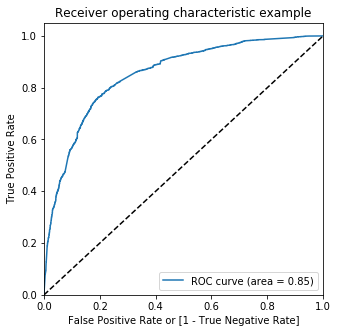

In [88]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

In [89]:
###Making predictions on the test set

In [90]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [91]:
X_test=X_test[X_train.columns]

In [92]:
X_test.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
count,2700.000000,2.700000e+03,2.700000e+03,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000
mean,0.075556,-1.153398e-16,-5.209824e-17,0.323333,0.537407,0.319259,0.194074,0.127778,0.047778,0.049259,0.034444,0.029630,0.378519,0.102963,0.068889,0.369630,0.236296
std,0.264335,1.000185e+00,1.000185e+00,0.467835,0.498691,0.466276,0.395559,0.333904,0.213335,0.216449,0.182402,0.169595,0.485108,0.303967,0.253312,0.482794,0.424885
min,0.000000,-1.082975e+00,-8.854993e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.537293e-01,-8.616378e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-9.523743e-02,-4.403907e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.632544e-01,8.224329e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,4.843451e+00,2.912149e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
X_test_sm = sm.add_constant(X_test)

In [94]:
#Making predicton on test set.
y_test_pred = modres.predict(X_test_sm)

In [95]:
y_test_pred.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [96]:
y_test_pred_final=pd.DataFrame()
y_test_pred_final['Lead_Prob'] = y_test_pred
y_test_pred_final['Lead'] = Y_test[0:]


In [97]:
y_test_pred_final.head()

,Lead_Prob,Lead
0,0.297226,0
1,0.211583,0
2,0.182810,0
3,0.174653,0
4,0.059331,1


In [98]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Lead_Prob,Lead,predicted
0,0.297226,0,0
1,0.211583,0,0
2,0.182810,0,0
3,0.174653,0,0
4,0.059331,1,0


In [99]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Lead, y_test_pred_final.predicted)

0.792962962962963

In [100]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Lead, y_test_pred_final.predicted )
confusion2

array([[1462,  239],
       [ 320,  679]])

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6796796796796797

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.8594944150499706

In [104]:
y_test_prob=pd.DataFrame(y_test_pred)

In [105]:
#Creating new column Leadscore based on prediction and appending to the main dataframe
LeadScore = []
for i in y_test_prob[0]:
    i= round(i, 2)
    LeadScore.append(round(i*100,0))

In [106]:
LeadScore = pd.DataFrame(LeadScore)
LeadScore.columns=['LeadScore']
LeadScore.head()

,LeadScore
0,30.0
1,21.0
2,18.0
3,17.0
4,6.0


In [107]:
X_test=X_test.reset_index()
X_test=X_test.drop(['index'],1)
Final=pd.concat([X_test, LeadScore], axis=1)

In [108]:
Final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,LeadScore
0,0,-0.424483,-0.397256,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30.0
1,0,-0.424483,-0.661568,0,0,0,0,1,0,0,0,0,1,0,0,0,0,21.0
2,1,-0.753729,1.386849,0,0,1,0,0,0,0,1,0,0,0,0,1,0,18.0
3,0,1.221746,-0.571629,0,0,1,0,0,0,0,0,0,0,0,1,0,0,17.0
4,0,-1.082975,-0.885499,0,0,0,1,0,0,0,0,0,0,1,0,1,0,6.0
